# Credit Card Fraud Detection

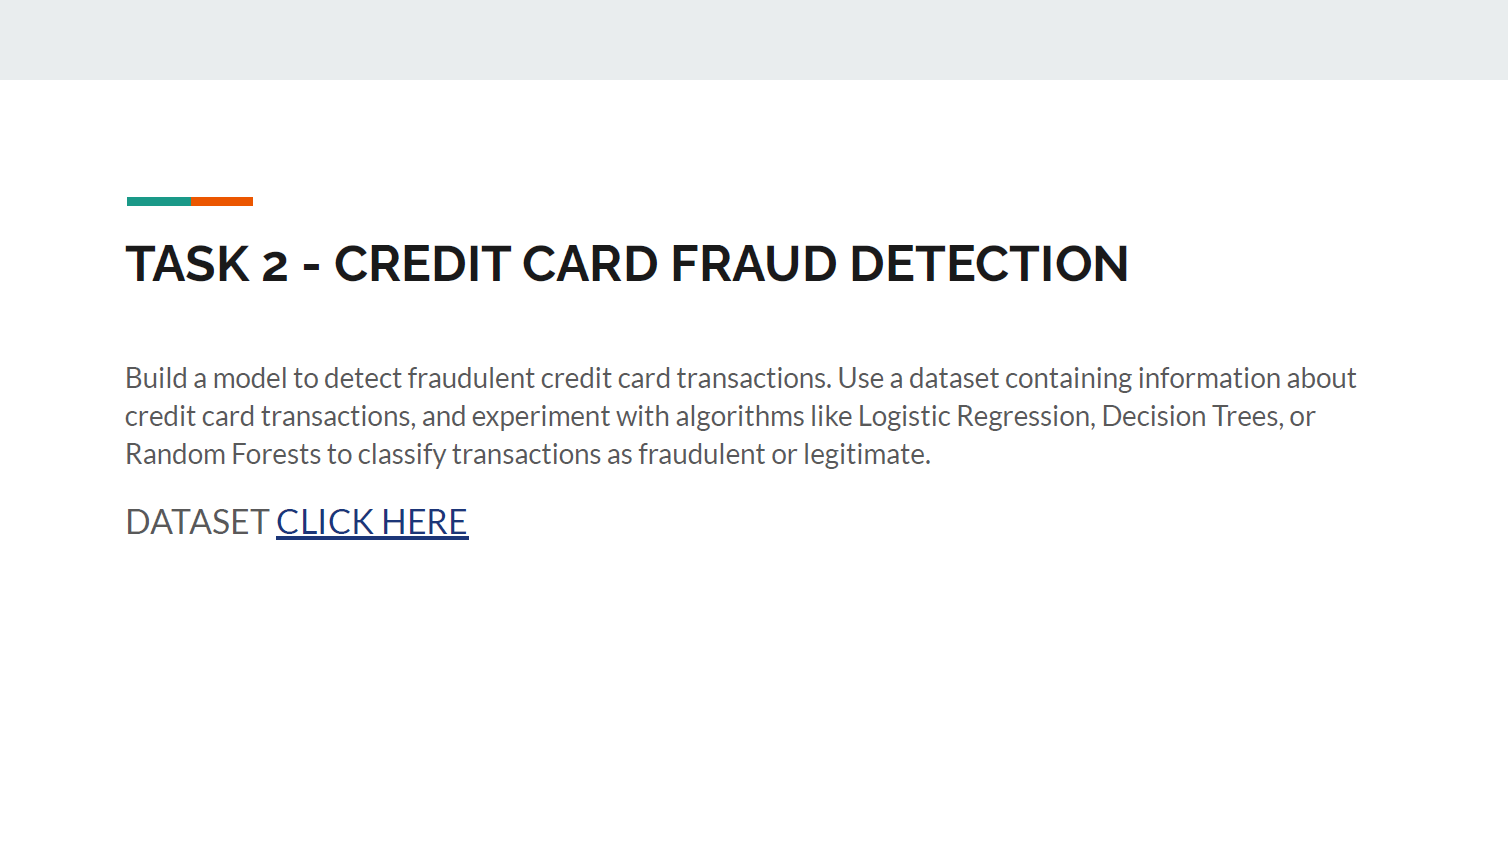

In [1]:
from IPython.display import Image
Image(filename='Project 2.png')

### 0. Import libraries, Read files, Define etc

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import torch
import os
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [28]:
train_data=pd.read_csv('E:/NeuroNexus Internship/Project 2/archive/fraudTrain.csv')
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [23]:
test_data=pd.read_csv('E:/NeuroNexus Internship/Project 2/archive/fraudTest.csv')
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


### 1. Data Preprocessing

In [30]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [31]:
def preprocess_data(input_data):
    # Identify and remove irrelevant columns from the dataset
    columns_to_remove = ['merchant', 'first', 'last', 'street', 'zip', 'unix_time', 'Unnamed: 0', 'trans_num', 'cc_num']
    input_data.drop(columns=columns_to_remove, inplace=True)

    # Convert 'trans_date_trans_time' to a datetime object and create a new column 'trans_date' with date in 'YYYY-MM-DD' format
    input_data['trans_date_trans_time'] = pd.to_datetime(input_data['trans_date_trans_time'])
    input_data['trans_date'] = input_data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    input_data['trans_date'] = pd.to_datetime(input_data['trans_date'])
    input_data['dob'] = pd.to_datetime(input_data['dob'])
    
    # Calculate the age of individuals during each transaction
    input_data["age"] = (input_data["trans_date"] - input_data["dob"]).dt.days // 365
    input_data['trans_month'] = input_data['trans_date'].dt.month
    input_data['trans_year'] = input_data['trans_date'].dt.year
    
    # Transform 'gender' to binary values: 'M' to 1, others to 0
    input_data['gender'] = input_data['gender'].apply(lambda x: 1 if x == 'M' else 0).astype(int)
    
    # Create 'lat_dis' and 'long_dis' columns to represent absolute differences between latitudes and longitudes
    input_data['lat_dis'] = abs(input_data['lat'] - input_data['merch_lat'])
    input_data['long_dis'] = abs(input_data['long'] - input_data['merch_long'])
    
    # Apply one-hot encoding to the 'category' column using pd.get_dummies
    input_data = pd.get_dummies(input_data, columns=['category'])
    
    # Drop unnecessary columns after feature engineering
    input_data = input_data.drop(columns=['city', 'trans_date_trans_time', 'state', 'job', 'merch_lat', 'merch_long', 'lat', 'long', 'dob', 'trans_date'])
    
    return input_data


In [32]:
train_data_pre = preprocess_data(train_data.copy())
train_data_pre.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30,1,2019,0.067507,0.870215,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40,1,2019,0.271247,0.024038,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56,1,2019,0.969904,0.107519,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,52,1,2019,0.803731,0.447271,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32,1,2019,0.254299,0.830441,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
test_data_pre = preprocess_data(test_data.copy())
test_data_pre.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52,6,2020,0.020491,0.265214,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30,6,2020,0.870202,0.475569,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49,6,2020,0.177090,0.659611,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32,6,2020,0.242698,0.063961,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,65,6,2020,0.706248,0.867734,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 2. Dataset Split and Feature mapping

In [34]:
x_train=train_data_pre.drop('is_fraud',axis=1)
y_train=train_data_pre['is_fraud']
x_test=test_data_pre.drop('is_fraud',axis=1)
y_test=test_data_pre['is_fraud']

In [36]:
# Initialize a StandardScaler to standardize the features based on the mean and standard deviation of the training set
scaler = StandardScaler()

# Fit the scaler on the training data to compute the mean and standard deviation
scaler.fit(x_train)

# Transform the features of the training set using the computed mean and standard deviation
x_train = scaler.transform(x_train)

# Transform the features of the test set using the same mean and standard deviation obtained from the training set
x_test = scaler.transform(x_test)

### 3. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

Training Accuracy for Decision Tree: 100.00%
Test Accuracy for Decision Tree: 99.66%

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.55      0.60      0.57      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.80      0.79    555719
weighted avg       1.00      1.00      1.00    555719



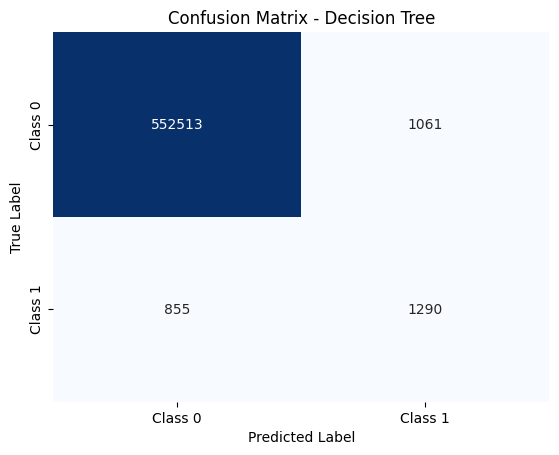

In [43]:
# Initialize a DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()

# Train the Decision Tree model on the training data
DecisionTree.fit(x_train, y_train)

# Predict the labels for the test set
y_pred_dt = DecisionTree.predict(x_test)

# Calculate the accuracy of the Decision Tree model on the training set
train_accuracy_dt = accuracy_score(y_train, DecisionTree.predict(x_train))
print("Training Accuracy for Decision Tree: {:.2%}".format(train_accuracy_dt))

# Calculate the accuracy of the Decision Tree model on the test set
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Test Accuracy for Decision Tree: {:.2%}".format(test_accuracy_dt))

# Display the classification report for the Decision Tree model
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

# Generate a confusion matrix and plot a heatmap to visualize the results
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 4. Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

Training Accuracy for Random Forest: 100.00%
Test Accuracy for Random Forest: 99.80%

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.61      0.70      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.81      0.85    555719
weighted avg       1.00      1.00      1.00    555719



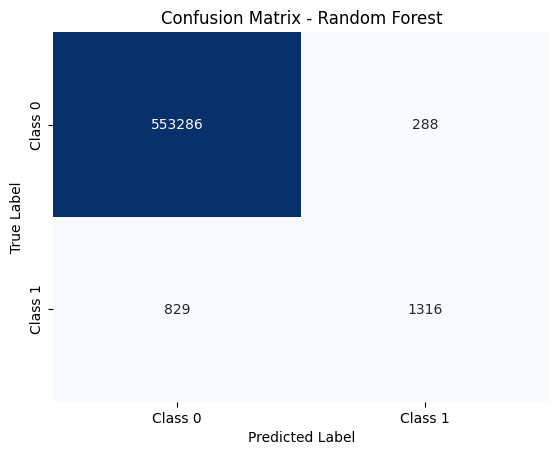

In [48]:
# Initialize a RandomForestClassifier with specified parameters
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the Random Forest model on the training data
random_forest.fit(x_train, y_train)

# Predict the labels for the training set
y_train_pred_rf = random_forest.predict(x_train)

# Calculate the accuracy of the Random Forest model on the training set
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Training Accuracy for Random Forest: {:.2%}".format(train_accuracy_rf))

# Predict the labels for the test set
y_test_pred_rf = random_forest.predict(x_test)

# Calculate the accuracy of the Random Forest model on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Test Accuracy for Random Forest: {:.2%}".format(test_accuracy_rf))

# Display the classification report for the Random Forest model
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_test_pred_rf))

# Generate a confusion matrix and plot a heatmap to visualize the results
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 5. Full Connected Deep Neural Network

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [54]:
# Build the Neural Network model
model = Sequential()

# Input layer with 100 neurons and ReLU activation function
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))

# First hidden layer with 200 neurons and ReLU activation function
model.add(Dense(15, activation='relu'))

# Add Dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Output layer with 2 neurons (binary classification) and softmax activation function
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/2
40522/40522 [==============================] - 58s 1ms/step - loss: 0.0214 - accuracy: 0.9949 - val_loss: 0.0106 - val_accuracy: 0.9974
Epoch 2/2
40522/40522 [==============================] - 60s 1ms/step - loss: 0.0164 - accuracy: 0.9959 - val_loss: 0.0102 - val_accuracy: 0.9975


40522/40522 [==============================] - 30s 734us/step
Training Accuracy for Deep Neural Network: 99.67%
17367/17367 [==============================] - 15s 866us/step - loss: 0.0102 - accuracy: 0.9975

Test Accuracy for Deep Neural Network: 99.75%

Classification Report for Deep Neural Network:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.77      0.51      0.61      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.75      0.80    555719
weighted avg       1.00      1.00      1.00    555719



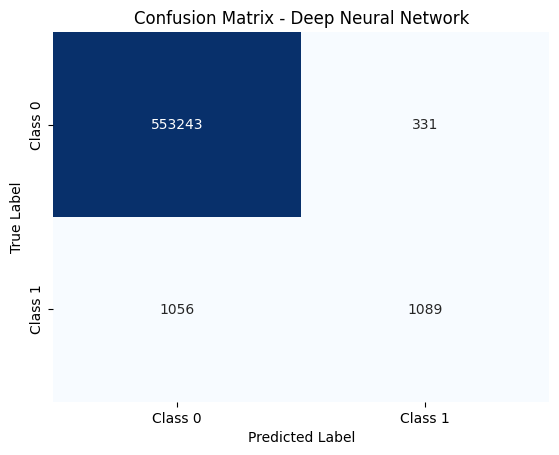

In [55]:
# Predict the probabilities for each class for the training set
y_train_pred_prob_nn = model.predict(x_train)
# Convert the predicted probabilities to class labels using argmax
y_train_pred_nn = tf.argmax(y_train_pred_prob_nn, axis=1)
train_accuracy_nn = accuracy_score(y_train, y_train_pred_nn)
print("Training Accuracy for Deep Neural Network: {:.2%}".format(train_accuracy_nn))

# Evaluate the model on the test set
y_test_pred_prob_nn = model.predict(x_test)
# Convert the predicted probabilities to class labels using argmax
y_test_pred_nn = tf.argmax(y_test_pred_prob_nn, axis=1)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("\nTest Accuracy for Deep Neural Network: {:.2%}".format(test_accuracy))

# Display the classification report for the Deep Neural Network
print("\nClassification Report for Deep Neural Network:\n", classification_report(y_test, y_test_pred_nn))

# Generate a confusion matrix and plot a heatmap to visualize the results
conf_matrix_nn = confusion_matrix(y_test, y_test_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - Deep Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()